In [26]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sbn 
import pickle as pkl
from matplotlib import cm
import torch 

import sys 
sys.path.append('../src/')
from utils import load_config, get_corruption_scores
from AE import AE

In [9]:
mydir = '../results/exp9/'

res = pd.read_csv(mydir + '/results.csv', sep='\t')
res.head(10)

,uid,config,config-checksum,method,perf_filter_low,perf_filter_high,runtime_s
0,78842d87-373c-4bae-8a9b-ad92b3e186dd,../configs/exp9.py,ab19c4458bd90f363204dda6fe0b106d,dvgs,"[0.42008346620495535, 0.4216371041735395, 0.42...","[0.4201750236162608, 0.3829692383672839, 0.370...",29257.667066
1,4ac572e7-ed74-4f3f-858a-beb7ae75c02b,../configs/exp9.py,ab19c4458bd90f363204dda6fe0b106d,apc,"[0.4128877060800477, 0.415423364456647, 0.4129...","[0.41462586163073567, 0.40857320975734296, 0.3...",2985.698319
2,0552caa7-e171-4172-ab7f-4c8f6cba2676,../configs/exp9.py,ab19c4458bd90f363204dda6fe0b106d,dvgs,"[0.40583059360356283, 0.40443824543610823, 0.4...","[0.40641453373301306, 0.36964693198204157, 0.3...",27500.461828
3,c49839d4-d745-44d6-9659-5a7db9dd1886,../configs/exp9.py,ab19c4458bd90f363204dda6fe0b106d,apc,"[0.40551809584227777, 0.4068679180686689, 0.40...","[0.4063277628573914, 0.4020127552080099, 0.390...",2276.410040
4,63305fcb-704f-48b2-96e6-ffac5fddecee,../configs/exp9.py,ab19c4458bd90f363204dda6fe0b106d,dvgs,"[0.40576995046010544, 0.40407104462231697, 0.4...","[0.4045956341212905, 0.3662746113057035, 0.352...",28233.125688
5,264e96fb-11c2-4eea-bd14-daa1635d2110,../configs/exp9.py,ab19c4458bd90f363204dda6fe0b106d,apc,"[0.4032914475735848, 0.4018264783239898, 0.402...","[0.40201404271322944, 0.3988249093388967, 0.39...",3004.120788


In [27]:
model = AE(in_channels      = 978, 
           num_layers       = 2, 
           hidden_channels  = 256, 
           latent_channels  = 64,
           norm             = False, 
           dropout          = 0.0, 
           act              = torch.nn.Mish)

In [28]:
sum([p.numel() for p in model.parameters()])

666642

In [11]:
res[lambda x: x.method == 'dvgs'].runtime_s.mean() / 60 / 60

7.869560609415725

In [126]:
apc = pd.read_csv('../data/processed/APC.csv', low_memory=False)
apc.head()

,sig_id,APC
0,MET001_N8_XH:BRD-U44432129:100:336,0.397076
1,ABY001_A549_XH:BRD-K81418486:10:3,0.399375
2,ABY001_HT29_XH:BRD-K70511574:2.5:24,0.329727
3,ABY001_H1975_XH:BRD-A61304759:10:3,0.242166
4,ABY001_H1975_XH:BRD-K85606544:10:24,0.524874


In [13]:
uid = '78842d87-373c-4bae-8a9b-ad92b3e186dd'
vals = np.load(f'{mydir}/data_values/{uid}/data_values.npy')
kwargs = np.load(f'{mydir}/data_values/{uid}/kwarg_dict.pkl', allow_pickle=True)
train_ids = kwargs['idx_train']

osig = pd.read_csv('../data/processed/ordered_siginfo.tsv', sep='\t', low_memory=False)
osig.head()

,sig_id,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,...,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig,APC
0,ABY001_A375_XH:BRD-A61304759:0.625:24,b15,0.66,0.625,uM,0.66 uM,24 h,24.0,h,A375,...,H15|H23,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:H15|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.263963
1,ABY001_A375_XH:BRD-A61304759:0.625:3,b15,0.66,0.625,uM,0.66 uM,3 h,3.0,h,A375,...,P03|P07|P11,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:P03|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.126818
2,ABY001_A375_XH:BRD-A61304759:10:24,b15,10.00,10.000,uM,10 uM,24 h,24.0,h,A375,...,H13|H17|H21,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:H13|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.545588
3,ABY001_A375_XH:BRD-A61304759:10:3,b15,10.00,10.000,uM,10 uM,3 h,3.0,h,A375,...,P01|P05|P09,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:P01|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.253248
4,ABY001_A375_XH:BRD-A61304759:2.5:24,b15,2.50,2.500,uM,2.5 uM,24 h,24.0,h,A375,...,H14|H18|H22,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:H14|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.537649


In [24]:
len(train_ids)

710216

In [23]:
len(vals)

710216

In [16]:
np.nan in vals

False

In [17]:
np.inf in vals

False

In [18]:
None in vals

False

In [133]:
vals_apc = pd.DataFrame({'vals':vals, 'sig_id':osig.sig_id.values[train_ids]}).merge(apc, on='sig_id', how='left')
vals_apc.head()

,vals,sig_id,APC
0,0.036465,ABY001_A375_XH:BRD-A61304759:0.625:24,0.263963
1,0.027425,ABY001_A375_XH:BRD-A61304759:0.625:3,0.126818
2,0.028088,ABY001_A375_XH:BRD-A61304759:10:24,0.545588
3,0.034177,ABY001_A375_XH:BRD-A61304759:10:3,0.253248
4,0.031388,ABY001_A375_XH:BRD-A61304759:2.5:24,0.537649


In [134]:
vals_apc[['vals', 'APC']].corr(method='pearson')

,vals,APC
vals,1.00000,-0.05377
APC,-0.05377,1.00000


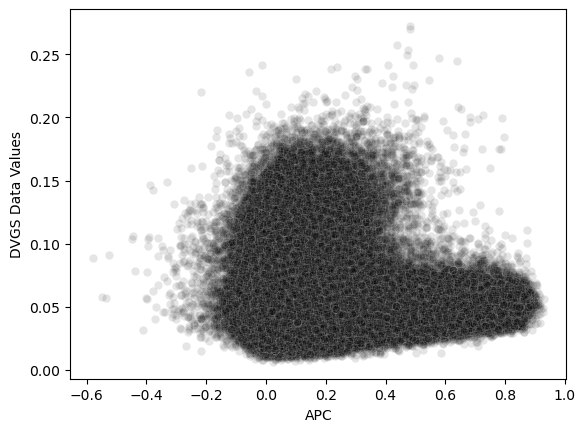

In [135]:
plt.figure()
sbn.scatterplot(x='APC', y='vals', c='k', data=vals_apc, alpha=0.1)
plt.ylabel('DVGS Data Values')
plt.savefig(mydir + '/dvgs_apc_corr.png', dpi=300)
plt.show()

In [123]:
config = load_config(res.config[0])

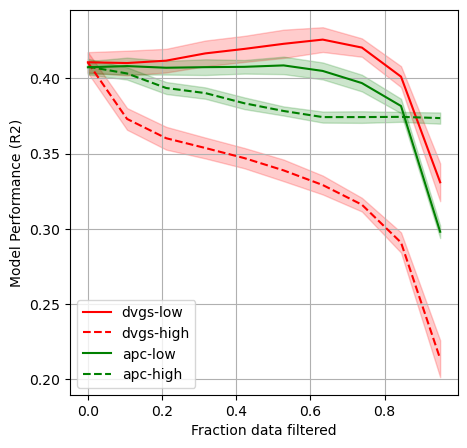

In [124]:
plt.figure(figsize=(5, 5))

for method, c in zip(res.method.unique(), ['r', 'g', 'b', 'm', 'c']): 

    _temp = res[lambda x: x.method == method]
    
    _low = [] 
    _high = [] 
    for i,row in _temp.iterrows(): 
        _low.append(row.perf_filter_low.strip('[]').split(','))
        _high.append(row.perf_filter_high.strip('[]').split(','))

    _low = np.stack(_low, axis=0).astype(float)
    _high = np.stack(_high, axis=0).astype(float)

    plt.plot(config.filter_kwargs['qs'], _low.mean(axis=0), color=c, label=f'{method}-low', linestyle='-')
    plt.fill_between(config.filter_kwargs['qs'], (_low.mean(axis=0)-_low.std(axis=0)), (_low.mean(axis=0)+_low.std(axis=0)), color=c, alpha=.2)
 
    plt.plot(config.filter_kwargs['qs'], _high.mean(axis=0), label = f'{method}-high', color=c, linestyle='--')
    plt.fill_between(config.filter_kwargs['qs'], (_high.mean(axis=0)-_high.std(axis=0)), (_high.mean(axis=0)+_high.std(axis=0)), color=c, alpha=.2)

plt.legend()
plt.xlabel('Fraction data filtered')
plt.ylabel('Model Performance (R2)')
plt.grid(visible=True)
plt.savefig(mydir + '/lincs_filter_perf_plot.png', dpi=300)
plt.show()

# adfadf 

In [5]:
with open('../results/exp10/dvgs_dti_results.pkl', 'rb') as ff: 
    dti_res = pkl.load(ff)

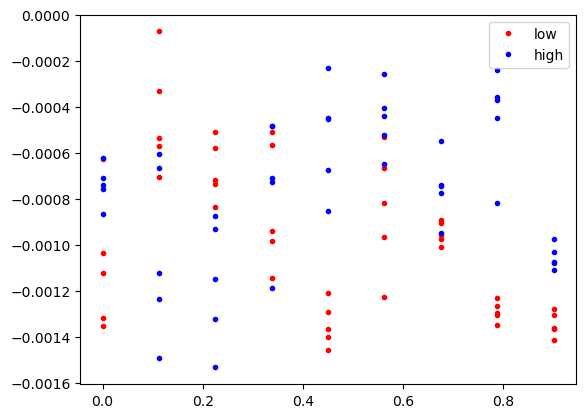

In [6]:
plt.figure() 
plt.plot(dti_res['q'], dti_res['low']['pos_sim'], 'r.', label='low')
plt.plot(dti_res['q'], dti_res['high']['pos_sim'], 'b.', label='high')
plt.legend()
plt.show()

In [137]:
exp9_avg_vals = pd.read_csv('../results/exp9/dvgs_avg_data_vals.csv')
exp9_avg_vals.head()

,sig_id,value
0,ABY001_A375_XH:BRD-A61304759:0.625:24,0.032421
1,ABY001_A375_XH:BRD-A61304759:0.625:3,0.022347
2,ABY001_A375_XH:BRD-A61304759:10:24,0.032463
3,ABY001_A375_XH:BRD-A61304759:10:3,0.030797
4,ABY001_A375_XH:BRD-A61304759:2.5:24,0.034902


In [138]:
exp10_avg_vals = pd.read_csv('../results/exp10/dvgs_avg_data_vals.csv')
exp10_avg_vals.head()

,sig_id,value
0,ABY001_A375_XH:BRD-A61304759:0.625:24,0.053557
1,ABY001_A375_XH:BRD-A61304759:0.625:3,0.023282
2,ABY001_A375_XH:BRD-A61304759:10:24,0.129911
3,ABY001_A375_XH:BRD-A61304759:10:3,0.044025
4,ABY001_A375_XH:BRD-A61304759:2.5:24,0.122940


In [140]:
apc = pd.read_csv('../data/processed/APC.csv', low_memory=False)
apc.head()

,sig_id,APC
0,MET001_N8_XH:BRD-U44432129:100:336,0.397076
1,ABY001_A549_XH:BRD-K81418486:10:3,0.399375
2,ABY001_HT29_XH:BRD-K70511574:2.5:24,0.329727
3,ABY001_H1975_XH:BRD-A61304759:10:3,0.242166
4,ABY001_H1975_XH:BRD-K85606544:10:24,0.524874


In [144]:
df = exp9_avg_vals.merge(exp10_avg_vals, on='sig_id', how='outer').merge(apc, on='sig_id', how='outer')#.rename({'value_x':'(target=all-APC) values', 'value_y':'(target=high-APC) values'}, axis=1)
df.head()

,sig_id,value_x,value_y,APC
0,ABY001_A375_XH:BRD-A61304759:0.625:24,0.032421,0.053557,0.263963
1,ABY001_A375_XH:BRD-A61304759:0.625:3,0.022347,0.023282,0.126818
2,ABY001_A375_XH:BRD-A61304759:10:24,0.032463,0.129911,0.545588
3,ABY001_A375_XH:BRD-A61304759:10:3,0.030797,0.044025,0.253248
4,ABY001_A375_XH:BRD-A61304759:2.5:24,0.034902,0.122940,0.537649


In [176]:
df2 = df[lambda x: x.value_x != -1.01]
df2 = df2[lambda x: x.value_y != -1.01]
df2 = df2[lambda x: ~x.APC.isna()]
df2[['value_x', 'value_y', 'APC']].corr('pearson')

,value_x,value_y,APC
value_x,1.000000,-0.020360,-0.031076
value_y,-0.020360,1.000000,0.860617
APC,-0.031076,0.860617,1.000000


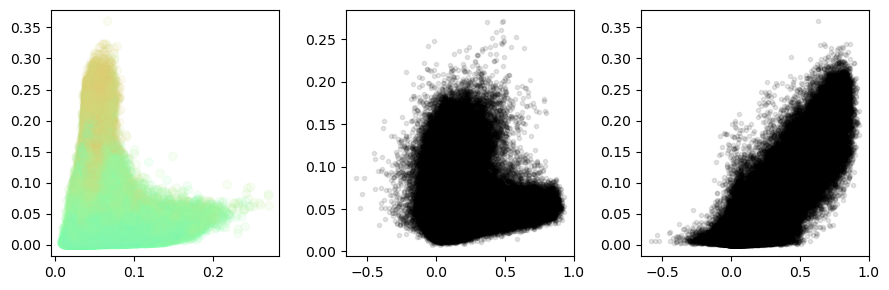

In [173]:
f, axes = plt.subplots(1,3, figsize=(9,3))

idxs1 = ((df.value_x.values != -1.01) & (df.value_y.values != -1.01) & (~df.APC.isna().values)).nonzero()[0]
cc = cm.rainbow(1/(1 + np.exp(-df.APC.values[idxs1])))
axes[0].scatter(df.value_x[idxs1], df.value_y[idxs1], alpha=0.1, color=cc)

idxs2 = ((df.value_x.values != -1.01) & (~df.APC.isna().values)).nonzero()[0]
axes[1].plot(df.APC[idxs2], df.value_x[idxs2], 'k.', alpha=0.1)

idxs3 = ((df.value_y.values != -1.01) & (~df.APC.isna().values)).nonzero()[0]
axes[2].plot(df.APC[idxs3], df.value_y[idxs3], 'k.', alpha=0.1)

plt.tight_layout()
plt.show()
